# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [17]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [19]:
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
df = pd.read_csv(airbnbDataSet_filename)
df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

PROJECT PROBLEM
Label: Predict the "price" of Airbnb NYC listings.
Type: The problem type for predicting the price of Airbnb listings is a regression problem because the target variable (in this case, the price) is continuous and can take any numerical value within a certain range. The goal is to build a model that can predict the price of a listing based on the input features.

In [4]:
#Feature Selection
selected_features = ['room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 
                     'amenities', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 
                     'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating', 
                     'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
                     'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 
                     'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 
                     'calculated_host_listings_count_shared_rooms', 'reviews_per_month',  'host_response_rate', 'host_identity_verified']

X = df[selected_features]
y = df['price']

In [5]:
#Handling Missing Values
X['bedrooms'].fillna(X['bedrooms'].mean(), inplace=True)
X['bathrooms'].fillna(X['bathrooms'].mean(), inplace=True)
X['accommodates'].fillna(X['accommodates'].mean(), inplace=True)
X['beds'].fillna(X['beds'].mean(), inplace=True)
X['review_scores_rating'].fillna(X['review_scores_rating'].mean(), inplace=True)
X['review_scores_cleanliness'].fillna(X['review_scores_cleanliness'].mean(), inplace=True)
X['review_scores_checkin'].fillna(X['review_scores_checkin'].mean(), inplace=True)
X['review_scores_communication'].fillna(X['review_scores_communication'].mean(), inplace=True)
X['review_scores_location'].fillna(X['review_scores_location'].mean(), inplace=True)
X['review_scores_value'].fillna(X['review_scores_value'].mean(), inplace=True)
X['reviews_per_month'].fillna(X['reviews_per_month'].mean(), inplace=True)
X['review_scores_rating'].fillna(X['review_scores_rating'].mean(), inplace=True)
X['host_response_rate'].fillna('unknown', inplace=True)
X['host_identity_verified'].fillna('unknown', inplace=True)

/home/codio/.local/lib/python3.6/site-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [6]:
#One-Hot Encoding and dropping the 'amenities' column-- the amenities columns had to be dropped because
# there were issues with the kernel continuously dying when running this cell and other cells such
# as feature-scaling which I had to take out altogether and modify my project plan for accordingly
X_encoded = pd.get_dummies(X, columns=['room_type', 'host_response_rate', 'host_identity_verified'], drop_first=True)
X_encoded = X_encoded.drop(columns='amenities')

In [7]:
#Data splitting
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

1. Gradient Boosting

In [20]:
#Gradient Boosting Model Training and Evaluation
gbdt_model = GradientBoostingRegressor(max_depth=3, n_estimators=300)
gbdt_model.fit(X_train, y_train)
y_gbdt_pred = gbdt_model.predict(X_test)

gbdt_rmse = mean_squared_error(y_test, y_gbdt_pred, squared=False)
gbdt_r2 = r2_score(y_test, y_gbdt_pred)

print('[GBDT] Root Mean Squared Error: {0}'.format(gbdt_rmse))
print('[GBDT] R2: {0}'.format(gbdt_r2))

[GBDT] Root Mean Squared Error: 93.23271166724197
[GBDT] R2: 0.5398293663296565


In [9]:
# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
}

grid_search = GridSearchCV(estimator=gbdt_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

best_gbdt_model = grid_search.best_estimator_
best_y_gbdt_pred = best_gbdt_model.predict(X_test)

best_gbdt_rmse = mean_squared_error(y_test, best_y_gbdt_pred, squared=False)
best_gbdt_r2 = r2_score(y_test, best_y_gbdt_pred)

print('Best GBDT Model:')
print(best_gbdt_model)
print('[Best GBDT] Root Mean Squared Error: {0}'.format(best_gbdt_rmse))
print('[Best GBDT] R2: {0}'.format(best_gbdt_r2))

Best GBDT Model:
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
[Best GBDT] Root Mean Squared Error: 91.3131078916923
[Best GBDT] R2: 0.5585835461460719


2. Linear Regression

In [16]:
# Linear Regression Model Training and Evaluation
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_lr_pred = lr_model.predict(X_test)

lr_rmse = mean_squared_error(y_test, y_lr_pred, squared=False)
lr_r2 = r2_score(y_test, y_lr_pred)

print('[Linear Regression] Root Mean Squared Error: {0}'.format(lr_rmse))
print('[Linear Regression] R2: {0}'.format(lr_r2))

[Linear Regression] Root Mean Squared Error: 106.65176387287808
[Linear Regression] R2: 0.3978310562006596


In [21]:
# Hyperparameter Tuning using GridSearchCV for Linear Regression
lr_param_grid = {
}

lr_grid_search = GridSearchCV(estimator=lr_model, param_grid=lr_param_grid, scoring='neg_mean_squared_error', cv=5)
lr_grid_search.fit(X_train, y_train)

best_lr_model = lr_grid_search.best_estimator_
best_y_lr_pred = best_lr_model.predict(X_test)

best_lr_rmse = mean_squared_error(y_test, best_y_lr_pred, squared=False)
best_lr_r2 = r2_score(y_test, best_y_lr_pred)

print('Best Linear Regression Model:')
print(best_lr_model)
print('[Best Linear Regression] Root Mean Squared Error: {0}'.format(best_lr_rmse))
print('[Best Linear Regression] R2: {0}'.format(best_lr_r2))


Best Linear Regression Model:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
[Best Linear Regression] Root Mean Squared Error: 106.65176387287808
[Best Linear Regression] R2: 0.3978310562006596


3. Random Forest

In [11]:
# Random Forest Model Training and Evaluation
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

rf_rmse = mean_squared_error(y_test, y_rf_pred, squared=False)
rf_r2 = r2_score(y_test, y_rf_pred)

print('[Random Forest] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[Random Forest] R2: {0}'.format(rf_r2))

[Random Forest] Root Mean Squared Error: 102.79063650195474
[Random Forest] R2: 0.44064261129486804


In [12]:
# Hyperparameter Tuning using GridSearchCV for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
}

rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, scoring='neg_mean_squared_error', cv=5)
rf_grid_search.fit(X_train, y_train)

best_rf_model = rf_grid_search.best_estimator_
best_y_rf_pred = best_rf_model.predict(X_test)

best_rf_rmse = mean_squared_error(y_test, best_y_rf_pred, squared=False)
best_rf_r2 = r2_score(y_test, best_y_rf_pred)

print('Best Random Forest Model:')
print(best_rf_model)
print('[Best Random Forest] Root Mean Squared Error: {0}'.format(best_rf_rmse))
print('[Best Random Forest] R2: {0}'.format(best_rf_r2))

Best Random Forest Model:
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
[Best Random Forest] Root Mean Squared Error: 102.95671676250134
[Best Random Forest] R2: 0.43883362805490966


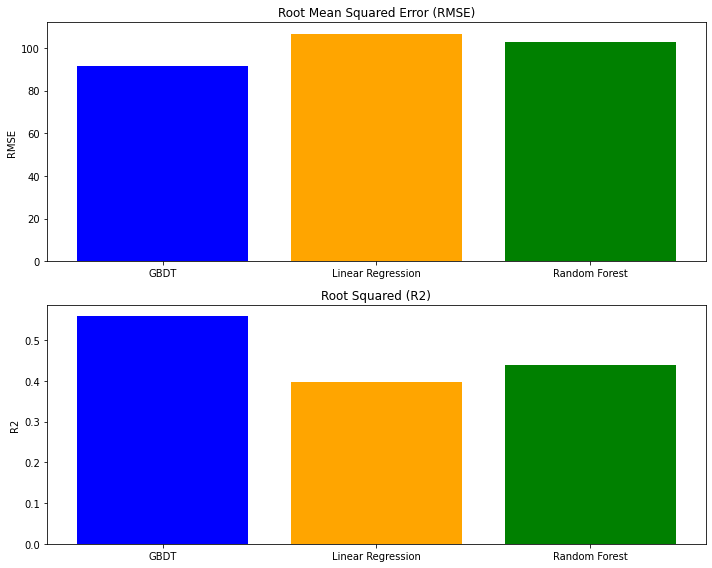

In [22]:
#Plotting Scores
model_names = ['GBDT', 'Linear Regression', 'Random Forest']
rmse_scores = [best_gbdt_rmse, best_lr_rmse, best_rf_rmse]
r2_scores = [best_gbdt_r2, best_lr_r2, best_rf_r2]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

axes[0].bar(model_names, rmse_scores, color=['blue', 'orange', 'green'])
axes[0].set_title('Root Mean Squared Error (RMSE)')
axes[0].set_ylabel('RMSE')

axes[1].bar(model_names, r2_scores, color=['blue', 'orange', 'green'])
axes[1].set_title('Root Squared (R2)')
axes[1].set_ylabel('R2')

plt.tight_layout()

plt.show()


For all three models, further tuning and modifications in the data engineering can be done to produce better results. A possible reason for this is because the 'amenities' columns for the dataset was dropped from the set when preparing the data, and there were errors every time I tried to run feature-scaling in the notebook. Amenities are an important factor/feature to consider when determining the price of an Airbnb listing, but considering practicalness, time-constraints, and other factors, I had to make revisions to the data and project plan.

Regardless, the graphs above indicate that the GBDT model seems to be the best performing model (out of the three) for this problem presented in my project plan, as it wields a higher R2 score compared to the other models and a low RMSE score.